In [1]:
# Checkout www.pygimli.org for more examples


# ERT field data with topography

Simple example of data measured over a slagdump demonstrating:

- 2D inversion with topography
- geometric factor generation
- topography effect


In [2]:
import pygimli as pg
from pygimli.physics import ert

Get some example data with topography, typically by a call like
data = ert.load("filename.dat")
that supports various file formats



In [3]:
data = pg.getExampleFile('ert/slagdump.ohm', load=True, verbose=True)
print(data)

27/08/23 - 23:06:14 - pyGIMLi - INFO - Looking for ert/slagdump.ohm in gimli-org/example-data/
27/08/23 - 23:06:14 - pyGIMLi - INFO - Getting: /home/ubuntu_jc/.cache/pygimli/example-data/gimli-org/example-data/master/ert/slagdump.ohm from https://raw.githubusercontent.com//gimli-org/example-data//master/ert/slagdump.ohm


No module named 'tqdm'.
You need to install this optional dependency to use nice progressbar in jupyter notebook.
[:::::::::::::::::::::::::::::::::::: 100% ::::::::::::::::::::::::::::::::::::] 5435 of 5435 complete

27/08/23 - 23:06:15 - pyGIMLi - INFO - Reading /home/ubuntu_jc/.cache/pygimli/example-data/gimli-org/example-data/master/ert/slagdump.ohm (<class 'pgcore._pygimli_.DataContainerERT'>)



md5: f27293809709e8fdc89bfb0a55e6e1ec
Data: Sensors: 38 data: 222, nonzero entries: ['a', 'b', 'm', 'n', 'r', 'valid']


The data file does not contain geometric factors (token field 'k'),
so we create them based on the given topography.



In [4]:
data['k'] = ert.createGeometricFactors(data, numerical=True)

27/08/23 - 23:06:15 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.


ModellingBase::setMesh() copying new mesh ... Found topography for surface=114.662 : 114.928
Warning! swap YZ coordinates for sensor positions to meet mesh dimensions.
Found datafile: 38 electrodes
Found: 38 node-electrodes
rMin = 0.999991, rMax = 132.345
NGauLeg + NGauLag for inverse Fouriertransformation: 12 + 4
Found non-Neumann domain
0.0094249 s
FOP updating mesh dependencies ... 1.9e-06 s
Forward: time: 3.55028s


27/08/23 - 23:06:18 - pyGIMLi - INFO - Save RVector binary
27/08/23 - 23:06:18 - pyGIMLi - INFO - Cache stored: /home/ubuntu_jc/.cache/pygimli/1731047289577552657


We initialize the ERTManager for further steps and eventually inversion.



In [5]:
mgr = ert.ERTManager(sr=False)

It might be interesting to see the topography effect, i.e the ratio between
the numerically computed geometry factor and the analytical formula



27/08/23 - 23:06:18 - pyGIMLi - WARNING - Sensor z-coordinates not equal. Is there topography?
27/08/23 - 23:06:18 - pyGIMLi - INFO - Calculate analytical flat earth geometric factors.
27/08/23 - 23:06:18 - pyGIMLi - INFO - Save RVector binary
27/08/23 - 23:06:18 - pyGIMLi - INFO - Cache stored: /home/ubuntu_jc/.cache/pygimli/4969034723439821981


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f347de8df60>)

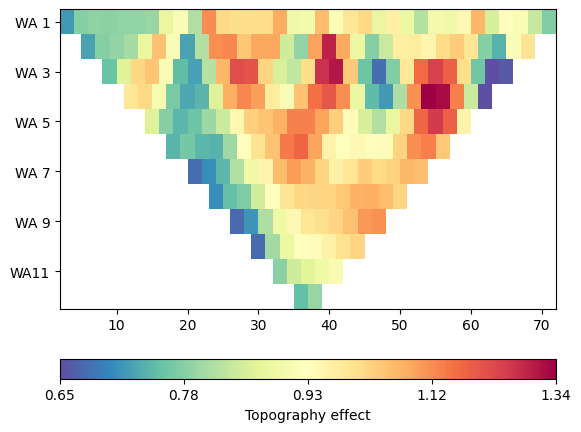

In [6]:
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')

The data container has no apparent resistivities (token field 'rhoa') yet.
We can let the Manager fix this later for us (as we now have the 'k' field),
or we do it manually.



In [7]:
mgr.checkData(data)
print(data)

27/08/23 - 23:06:19 - pyGIMLi - INFO - Creating apparent resistivies from impedences rhoa = r * k


Data: Sensors: 38 data: 222, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'r', 'rhoa', 'valid']


The data container does not necessarily contain data errors data errors
(token field 'err'), requiring us to enter data errors. We can let the
manager guess some defaults for us automaticly or set them manually



(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f347bdeef20>)

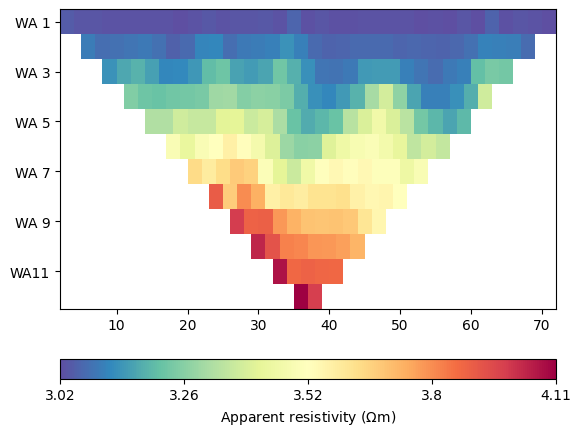

In [8]:
data['err'] = ert.estimateError(data, absoluteUError=5e-5, relativeError=0.03)
# or manually:
# data['err'] = data_errors  # somehow
ert.show(data, data['err']*100)

Now the data have all necessary fields ('rhoa', 'err' and 'k') so we can run
the inversion. The inversion mesh will be created with some optional values
for the parametric mesh generation.




27/08/23 - 23:06:19 - pyGIMLi - INFO - Found 2 regions.
27/08/23 - 23:06:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/08/23 - 23:06:19 - pyGIMLi - INFO - Found 2 regions.
27/08/23 - 23:06:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/08/23 - 23:06:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
27/08/23 - 23:06:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
27/08/23 - 23:06:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3406 Cells: 6492 Boundaries: 5028
27/08/23 - 23:06:19 - pyGIMLi - INFO - Use median(data values)=10.648608361317013
27/08/23 - 23:06:19 - pyGIMLi - INFO - Created startmodel from forward operator: 1029 [10.648608361317013,...,10.648608361317013]
27/08/23 - 23:06:19 - pyGIMLi - INFO - Starting inversion.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  1

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  1

Statistics:

  Input vertices: 120
  Input segments: 121
  Input holes: 0

  Mesh vertices: 892
  Mesh triangles: 1623
  Mesh edges: 2514
  Mesh exterior boundary edges: 159
  Mesh interior boundary edges: 38
  Mesh subsegments (constrained edges): 197

min/max(dweight) = 24.3573/33.1265
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f34877a2430>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f34877a26b0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x7f34877a2520>
min/max (data): 6.

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f347911a500>)

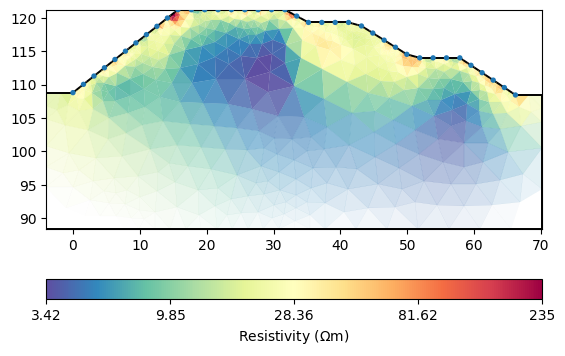

In [9]:
mod = mgr.invert(data, lam=10, verbose=True,
                 paraDX=0.3, paraMaxCellSize=10, paraDepth=20, quality=33.6)

mgr.showResult()

We can view the resulting model in the usual way.



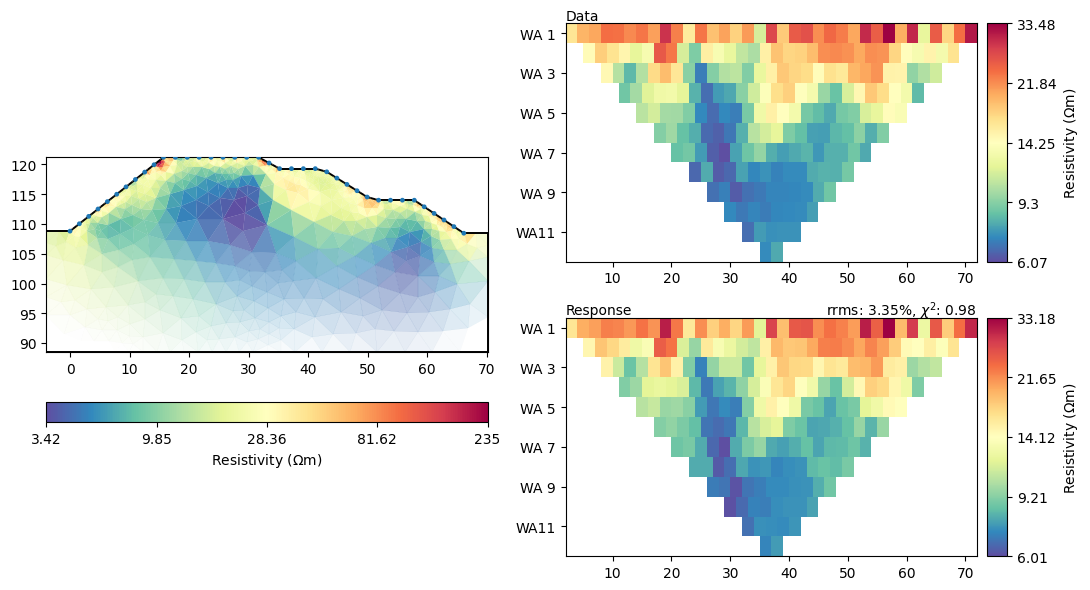

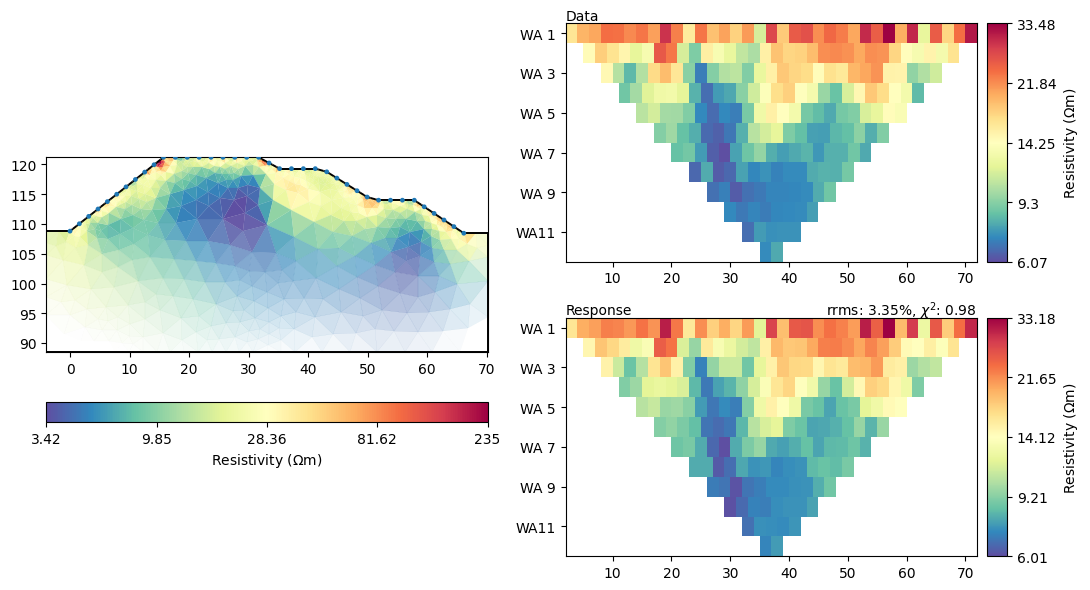

In [10]:
mgr.showResultAndFit()
# np.testing.assert_approx_equal(ert.inv.chi2(), 1.10883, significant=3)

Or just plot the model only using your own options.



(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f34787fe6b0>)

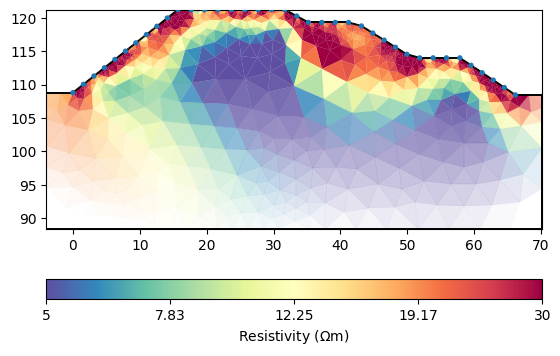

In [11]:
mgr.showResult(mod, cMin=5, cMax=30, cMap="Spectral_r", logScale=True)